In [1]:
import pandas as analytics
import os
import matplotlib.pyplot as graph
import numpy as maths
from math import log
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('../data/')

In [3]:
filename = 'heart.csv'

# Manual Preprocessing

In [15]:
df_raw = analytics.read_csv(filename)
df_raw = df_raw.drop(['sex','age'],axis =1)
df_raw.to_csv('check.csv',header=None)
df_raw = analytics.read_csv('check.csv',header=None)

In [16]:
cols = ['x'+str(i+1) for i in df_raw.columns[:-1]] + ['y']
df_raw.columns = cols
df_raw['y'] = df_raw['y'].replace(-1,0)
df_raw

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
0,0,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1020,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,1021,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,1022,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,1023,0,110,254,0,0,159,0,0.0,2,0,2,1


In [17]:
training_perc = 0.7

In [18]:
training_number =  int(training_perc * len(df_raw))
df_raw = df_raw.sample(frac = 1)
df_train = df_raw[:training_number]
df_test = df_raw[training_number:]

In [19]:
maxima = {}
minima = {}
for col in df_raw.columns[:-1]:
    maxima.update({col:df_train[col].max()})
    minima.update({col:df_train[col].min()})    
    df_train[col] = (df_train[col] - minima[col])/(maxima[col] - minima[col])
df_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
380,0.371457,0.000000,0.490566,0.210046,0.0,0.5,0.259542,0.0,0.322581,0.5,0.25,1.000000,0
505,0.493646,0.666667,0.226415,0.264840,0.0,0.5,0.595420,0.0,0.048387,0.5,0.25,0.666667,1
37,0.036168,0.000000,0.415094,0.331050,0.0,0.0,0.847328,0.0,0.000000,1.0,0.00,0.666667,1
439,0.429130,0.333333,0.245283,0.360731,0.0,0.0,0.679389,0.0,0.290323,0.5,0.00,0.666667,0
494,0.482893,0.666667,0.292453,0.271689,1.0,0.0,0.725191,0.0,0.387097,0.5,0.00,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.390029,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1
504,0.492669,0.666667,0.132075,0.267123,0.0,0.5,0.618321,0.0,0.000000,1.0,0.00,0.666667,0
903,0.882698,0.666667,0.301887,0.210046,1.0,0.5,0.480916,0.0,0.354839,0.5,0.25,0.333333,0
287,0.280547,0.333333,0.622642,0.401826,0.0,0.5,0.694656,0.0,0.064516,1.0,0.50,0.666667,1


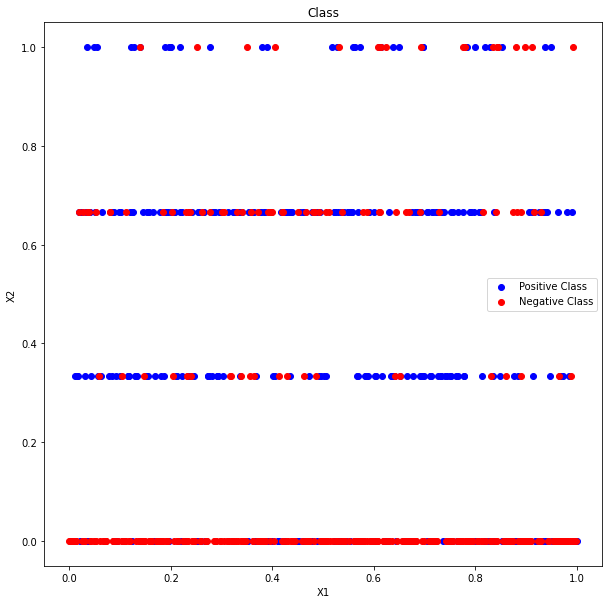

In [20]:
df_pos = df_train[df_train['y'] == 1]
df_neg = df_train[df_train['y'] == 0]
figure = graph.figure(figsize=(10,10))
graph.scatter(df_pos['x1'], df_pos['x2'], c = 'blue',label = 'Positive Class')
graph.scatter(df_neg['x1'], df_neg['x2'], c = 'red', label = 'Negative Class')
graph.title("Class")
graph.xlabel("X1")
graph.ylabel("X2")
graph.legend()
graph.show()

In [ ]:
mu_pos = df_pos.iloc[:,:-1].mean()
mu_neg = df_neg.iloc[:,:-1].mean()

In [ ]:
x_p = (df_pos - mu_pos).iloc[:,:-1]
x_n = (df_neg - mu_neg).iloc[:,:-1]

In [ ]:
covariance_matrix_pos = (x_p.T @ x_p) / (len(x_p) - 1)
covariance_matrix_neg = (x_n.T @ x_n) / (len(x_n) - 1 ) 

In [ ]:
covariance_matrix = ((len(x_p) - 1 )*covariance_matrix_pos + (len(x_n) - 1 )*covariance_matrix_neg)/((len(x_n) - 1 ) + (len(x_p) - 1 ))
covariance_matrix

In [ ]:
mu_pos = df_pos.iloc[:,:-1].mean()
mu_neg = df_neg.iloc[:,:-1].mean()

In [ ]:
covariance_matrix_inv = maths.linalg.inv(covariance_matrix)
covariance_matrix_inv

In [ ]:
w = covariance_matrix_inv @ maths.array(mu_pos - mu_neg)
w = maths.array(w).reshape(-1,1)
w.shape

In [ ]:
pi_pos = len(df_pos)/len(df_train)
pi_neg = len(df_neg)/len(df_train)

In [ ]:
w0 = (- 0.5 * mu_pos @ covariance_matrix_inv @ mu_pos.T) + (0.5 * mu_neg @ covariance_matrix_inv @ mu_neg.T) + log(abs(pi_pos / pi_neg))
w0

In [ ]:
hyperplane = -((w[0] * df_train['x1'])  + w0)/w[1]

In [ ]:
figure = graph.figure(figsize=(10,10))
graph.scatter(df_pos['x1'], df_pos['x2'], c = 'blue',label = 'Positive Class')
graph.scatter(df_neg['x1'], df_neg['x2'], c = 'red', label = 'Negative Class')
graph.title("Class")
graph.xlabel("X1")
graph.ylabel("X2")
graph.legend()
graph.plot(df_train['x1'],hyperplane)
graph.show()

In [ ]:
df_test_pos = df_test[df_test['y'] == 1]
df_test_neg = df_test[df_test['y'] == 0]

test_hyperplane = -((w[0] * df_test['x1'])  + w0)/w[1]

figure = graph.figure(figsize=(10,10))
graph.scatter(df_test_pos['x1'], df_test_pos['x2'], c = 'blue',label = 'Positive Class')
graph.scatter(df_test_neg['x1'], df_test_neg['x2'], c = 'red', label = 'Negative Class')
graph.title("Class")
graph.xlabel("X1")
graph.ylabel("X2")
graph.legend()
graph.plot(df_test['x1'],test_hyperplane)
graph.show()